# GAN


#AE(autoencoder) -> variational AE -> GAN(복잡해서 찾아낼수없는 특징을 찾아준다 , 왼쪽을 보는 이미지+ 오른쪽을 보는이미지 2개만 있어도 왼쪽에서 오른쪽으로 돌아가는 모습을 보여줌 )
#GAN: 화질개선에도 쓰인다   (정확한 자기자신 이미지의 특징을 뽑는다)                             

#FFNN : 전진신경망
#CNN : 특징추출 (주변을고려한특징)
#RNN  : 특징추출 (순서를고려한특징)
    
    
#Autoencoder, VAE, gAN : 확률적 특성 (수직,수평특성추출)      : 생성모델이라고 한다 
#AE : 타켓이 자기자신이다 -> 노이즈가 없는 자기자신의 사진을 생성 ?
#VARIATION AE -> GAN(GENERATOR 와 DISCRIMINATE 의 2개의 회로로 구성) 

[즉 TENSORFLOW 는 특징을 찾아내는것이다 ]

#머신러닝에서 비지도학습 ; PCA, MDS, T-SNE 


{'S': 0, 'E': 1, 'P': 2, 'a': 3, 'b': 4, 'c': 5, 'd': 6, 'e': 7, 'f': 8, 'g': 9, 'h': 10, 'i': 11, 'j': 12, 'k': 13, 'l': 14, 'm': 15, 'n': 16, 'o': 17, 'p': 18, 'q': 19, 'r': 20, 's': 21, 't': 22, 'u': 23, 'v': 24, 'w': 25, 'x': 26, 'y': 27, 'z': 28, '단': 29, '어': 30, '나': 31, '무': 32, '놀': 33, '이': 34, '소': 35, '녀': 36, '연': 37, '습': 38, '사': 39, '랑': 40}
41

In [9]:
import tensorflow as tf
import numpy as np
from tensorflow.python.framework import ops
ops.reset_default_graph()

# 데이터가 한글자씩 들어감
char_arr = [c for c in 'SEPabcdefghijklmnopqrstuvwxyz단어나무놀이소녀연습사랑'] 
                                
num_dic =  {n: i for i , n  in enumerate(char_arr)} #enumerate : 각 데이터에 번호를 달아줌
dic_len = len(num_dic)
print(dic_len)
seq_data =[['word','단어'],['wood','나무'],  #4글자이고 각단어마다 41자리로 표현(원핫인코딩 )
           ['game','놀이'],['girl','소녀'],
           ['test','연습'],['love','사랑']]
#seq2seq 번역망

def make_batch(seq_data) :
    
    input_batch = []
    output_batch = []
    target_batch = []
    for seq in seq_data:
        input = [num_dic[n] for n in seq[0]]          # word => num_dic에서 번호로 바뀜 25,17,..
        
        # 첫번째 입력 데이터는 'word'이 학습된 smoking gun이 들어옴 
        output = [num_dic[n] for n in ("S" + seq[1])] # Start의 S  => 시작을 확인하기 위해서
        target = [num_dic[n] for n in (seq[1] + 'E')] # End => 끝을 확인하기 위해서( 글자 수가 다른 경우, 인덱스로 지정이 어렵기 떄문에 E를 끝으로 설정하여 출력)
        
        input_batch.append(np.eye(dic_len)[input]) # 42개 대각행렬( 단위행렬(identity matrix)) => one-hot 인코딩
        # 숫자로된 word가 one-hot되어 4x41가 만들어짐
        
        output_batch.append(np.eye(dic_len)[output])
        # 2글자이므로 one-hot되어 2x41
        
        target_batch.append(target)
    return input_batch, output_batch, target_batch

learning_rate = 0.01
n_hidden = 128    # neurons 출력이 128차
total_epoch = 100
n_class = n_input = dic_len #41

# encoder, decoder용 데이터 주입 변수
enc_input = tf.placeholder(tf.float32, [None,None,n_input])
dec_input = tf.placeholder(tf.float32, [None,None,n_input])
targets = tf.placeholder(tf.int64, [None,None])
with tf.variable_scope('encode'):
    #FFNN한개 입력 => 가중치 =출력 (N_HIDDEN)
    enc_cell =tf.nn.rnn_cell.BasicRNNCell(n_hidden)
    #DROPOUT은 과적합 방지를 위해 계산회로 생략,SEED값을 주는것으로 보아 랜덤한것을 알 수 있따 
    enc_cell = tf.nn.rnn_cell.DropoutWrapper(enc_cell,
                                            output_keep_prob = 0.5, seed=100)
    # 셀이 4개 셀당  41 개의 데이터가입력
    otuputs , enc_states = tf.nn.dynamic_rnn(enc_cell, enc_input, dtype = tf.float32)

with tf.variable_scope('decode') :
    dec_cell = tf.nn.rnn_cell.BasicRNNCell(n_hidden)
    dec_cell = tf.nn.rnn_cell.DropoutWrapper(dec_cell,output_keep_prob = 0.5) #INITIONA
    #앞의 인코더망에서 출력된 STATES값 : 마지막 CELL 의 출력 
    #앞의 데이터를 다 고려한 특징 
    #두개의 망을 연결하는 지점이 : initial_state= enc_states
    outputs , dec_stats = tf.nn.dynamic_rnn(dec_cell, dec_input, initial_state= enc_states, dtype = tf.float32)
    
model = tf.layers.dense(outputs, n_class, activation = None) #OUTPUT으로 나온 차수  : 6X3X128
cost = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
                    logits = model, labels = targets))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

41
Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use keras.layers.dense instead.


In [7]:
input_batch, output_batch, target_batch = make_batch(seq_data)
for epoch in range(total_epoch) :
    _, loss = sess.run([optimizer, cost],
                      feed_dict = {enc_input: input_batch,
                                  dec_input : output_batch,
                                  targets : target_batch})
    print('Epoch : ', '%04d' % (epoch+1),
         'cost =  {:.6f}'.format(loss))

Epoch :  0001 cost =  3.725494
Epoch :  0002 cost =  2.813121
Epoch :  0003 cost =  1.748182
Epoch :  0004 cost =  1.067128
Epoch :  0005 cost =  0.582811
Epoch :  0006 cost =  0.433602
Epoch :  0007 cost =  0.561899
Epoch :  0008 cost =  0.190317
Epoch :  0009 cost =  0.166817
Epoch :  0010 cost =  0.090269
Epoch :  0011 cost =  0.146006
Epoch :  0012 cost =  0.118091
Epoch :  0013 cost =  0.102531
Epoch :  0014 cost =  0.133898
Epoch :  0015 cost =  0.012656
Epoch :  0016 cost =  0.066011
Epoch :  0017 cost =  0.221216
Epoch :  0018 cost =  0.200898
Epoch :  0019 cost =  0.108115
Epoch :  0020 cost =  0.037494
Epoch :  0021 cost =  0.019775
Epoch :  0022 cost =  0.040745
Epoch :  0023 cost =  0.094955
Epoch :  0024 cost =  0.009516
Epoch :  0025 cost =  0.021785
Epoch :  0026 cost =  0.019482
Epoch :  0027 cost =  0.004555
Epoch :  0028 cost =  0.009713
Epoch :  0029 cost =  0.038014
Epoch :  0030 cost =  0.007967
Epoch :  0031 cost =  0.006060
Epoch :  0032 cost =  0.003629
Epoch : 

In [8]:
def translate(word):
    #모델의 자리수는 일치시켜야함
    seq_data =[word,'P' * len(word)] #PPPP
    #1x4x41
    #1x4x41
    input_batch,ouput_batch,target_batch = make_batch([seq_data])
    
    prediction = tf.argmax(model,2) ##면행(열을 중심):41개
    result = sess.run(prediction,feed_dict={enc_input:input_batch,
                                           dec_input: ouput_batch,
                                           targets: target_batch})
    decoded = [char_arr[i] for i in result[0]]
    end = decoded.index('E')
    translated = ''.join(decoded[:end])
    return translated

print('word=>',translate('word'))

word=> 단어


# 이미지 글자 읽기


## OCR : KAKAO API
#카카오 :https://developers.kakao.com/docs/restapi/vision#%EB%AC%B8%EC%9E%90-%EC%9D%B8%EC%8B%9D

In [17]:
!pip install opencv-python # import cv2를 하기위한것 

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [49]:
import json
import cv2
import requests #html 페이지 요청
import sys
LIMIT_PX = 1024
LIMIT_BYTE = 1024*1024
LIMIT_BOX = 40 #박스단위로 잘라내기


# ocr 절차
#이미지 사이즈 조정
#글씨를 둘러싼 box를 detection 

In [50]:
def kakao_ocr_resize(image_path:str): #규격이미지 사이즈
    image = cv2.imread('2.jpg') #자기의 이미지로 변경 : 영수증
    height,width,_ = image.shape
    if LIMIT_PX<height or LIMIT_PX<width:
        ratio = float(LIMIT_PX) / max(height,width)
        imgate = cv2.resize(image,None,fx = ratio,fy = ratio)
        height,width,_ = height,width,_ = image.shape
        image_path = '{}_resized.jpg'.format('2')
        cv2.imwrite(image_path,image)
        return image_path
    return None
#글씨가 있는 영역을 detect 그런다음 다시 읽어줘야함 2번읽기

In [51]:
#사용법
#open api : 함수를 원격호출 (remote call )
def kakao_ocr_detect(image_path:str,appkey:str):
    API_URL = 'http://kapi.kakao.com/v1/vision/text/detect'
    headers = {'Authorization':'KakaoAK{}'.format('bb6a0234a916254c7a8adb9e6d35be68')} #이자리가 api id 
    image = cv2.imread('2.jpg')
    #네이버는 jpg형식만 .png(transparent 지원),gif(애니메이션 지원)
    jpeg_image = cv2.imencode('.jpg',image)[1]
    data = jpeg_image.tobytes() #네트워크 전송 => serialization #tobytes:사각형이미지가 일렬로 되도록
    #네트워크일 떄 = > 데이터가 시리얼로 가야함(네트워크 모뎀)
    #8개 line으로 구성 =>4개회선만 사용 => 1개는 전송, 1개는 수신
    #네트워크를 통해 함수 호출(시간): 비동기 방식
    #동기 방식, 비동기방식(다른작업을 하고있다가  event가 벌어짐 )
    #대표적인 비동기 통신 방식으로 ajax _페이지가 따른일을하고있는데 웹브라우저 내부적으로 처리하는 것 
    # flask 에서 사용 
    #인터넷에서 표준 데이터 포맷 : json
    return requests.post(API_URL,headers = headers,files={'file':data})

In [54]:
def main():
    image_path,appkey = sys.argv[0],sys.argv[0]
    resize_impath = kakao_ocr_resize(image_path)
    ouput =kakao_ocr_detect(image_path,appkey).json()
    boxes = ouput["result"]["boxes"]
    boxes = boxes[:min(len(boxes),LIMIT_BOX)]
    output =kakao_ocr_recognize(image_path,boxes,appkey).json()
ouput = main()
ouput["result"]

TypeError: 'int' object is not subscriptable

In [58]:
# 하림이거 
# pip install opencv-python
import json
import cv2 # computer vision tool (이미지, 동영상 처리)
import requests # html 페이지 요청
import sys
LIMIT_PX = 1024
LIMIT_BYTE = 1028*1024
LIMIT_BOX = 40
# OCR 절차
# 이미지 사이즈 조정
# 글씨를 둘러싼 Box를 detection

def kakao_ocr_resize(image_path: str):
    image = cv2.imread('2.jpg')
    height, width, _ = image.shape
    if LIMIT_PX < height or LIMIT_PX < width:
        ratio = float(LIMIT_PX) / max(heigth, width)
        image = cv2.resize(image, None, fx=ratio, fy=ratio)
        height, width, _ = height, width, _ = image.shape
        image_path = "{}_resize.jpg".format('2')
        cv2.imwrite(image_path, image)
        return image_path
    return None

# 사용법
# open api 함수를 원격호출 (remote call)
def kakao_ocr_detect(image_path: str, appkey: str):
    API_URL ='https://kapi.kakao.com/v1/vision/text/detect'
    headers = {'Authorization': 'KakaoAK {}'.format('bb6a0234a916254c7a8adb9e6d35be68')}
    image = cv2.imread('2.jpg') # 이미지 로드
    # naver는 jpg만, gif 애니메이션 지원, png 투명도 지원
    jpeg_image = cv2.imencode('.jpg', image)[1]
    data = jpeg_image.tobytes() # 네크워크 전송 -> serialization
    # 네트워크일 때 => 데이터가 시리얼로 가야 함 (모뎀)
    # 8개 라인으로 구성, 4개 회선만 사용 (1개 전송, 1개 수신)
    # 네트워크를 통해 함수 호출 (시간) : 비동기 방식
    # 동기 방식(호출 후 돌아올 때까지 기다림), 비동기 방식(다른 작업 중 -event 받아서 작업)
    # 대표적인 비동기 통신 방식이 AJAX : 웹 브라우저 내부적 처리
    # 인터넷 표준 데이터 형식 json
    return requests.post(API_URL, headers=headers, files={"file": data})

def kakao_ocr_recognize(image_path: str, boxes: list, appkey: str):
    API_URL = 'https://kapi.kakao.com/v1/vision/text/recognize'
    headers = {'Authorization': 'KakaoAK {}'.format('7d278c16a4138b64cf7e96eb6fb432a4')}
    image = cv2.imread('2.jpg')
    jpeg_image = cv2.imencode('.jpg', image)[1]
    data = jpeg_image.tobytes()
    # 인식은 BOX로 텍스트 구역을 확인하고, recognize 인식한다.
    return requests.post(API_URL, headers=headers, files={"file": data}, data={"boxes": json.dumps(boxes)})

def main():
    image_path, appkey = sys.argv[1], sys.argv[2]
    resize_impath = kakao_ocr_resize(image_path)
    output = kakao_ocr_detect(image_path, appkey).json()
    boxes = output['result']['boxes']
    boxes = boxes[:min(len(boxes), LIMIT_BOX)]
    output = kakao_ocr_recognize(image_path, boxes, appkey).json()
    return output
output = main()
output['result']

{'recognition_words': ['주문서 작성',
  '.',
  '카드매출전표',
  '(영수증) 발급',
  'Windows',
  'Internet E...',
  '',
  'https://admin.kop.co.kr/Modules/Sale/Card/ADSA_CARD_BI',
  '"이용해 주셔서 감',
  '주문상세내역',
  'KCF',
  '카드매출전표!',
  '구입 상품명',
  '카드종류/CARDTYPE',
  '카드번호/CARD NO',
  'BC카드',
  '9440-03ø-11ø-8302',
  '판매가 500원',
  '적립금',
  '0원',
  '수량 무제한타',
  '유효기간',
  '거래유형',
  '거래일시/TRANS.DATE',
  '++{+t',
  '2009/10/28 10:36:38',
  '일반일시를',
  '합신용승인',
  '거래취소일시/TRANS.DATE',
  '승인번호APPROVAL NO',
  '상품면가기TE500원',
  '47585139',
  '적립금',
  '0...',
  '주문자/PURCHASER',
  '주문번호ORDER NO',
  '결제방법',
  '비회원2',
  '200A1028103522',
  '신용카드']}

# 동영상 

## 동영상 실행

In [72]:
import cv2
import numpy as np

#cap = cv2.VideoCapture(0) #0번 디바이스 -카메라 영상을 받아들임

cap = cv2.VideoCapture('corrupted_video.mp4') #캡처ㅏ한것
if (cap.isOpened()==False): #파일이 없거나 장치가 없거나 
    print('에러발생')
    
while(cap.isOpened()):
    ret,frame=cap.read() #하나의 frame을 읽어옴 => 동영상은 ntsc 방식  / 초다아29.7 frame 가져오ㅠㅁ
    # frame = cv2.flip(frame,0)  #flip(뒤집는거) , # 자동 차선인식, object detection하는걸 여기에 넣어주면도니다?
    frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY) #고속 # 흑백
    if ret == True:  #
        cv2.imshow('Frame',frame) #이미지 출력과 동일
        if cv2.waitKey(25) & 0xFF == ord('q'): #ascii code 코드 표
            break
    else:
        break
cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


### 뒤집기

In [78]:
import cv2
import numpy as np

#cap = cv2.VideoCapture(0) #0번 디바이스 -카메라 영상을 받아들임

cap = cv2.VideoCapture('corrupted_video.mp4') #캡처ㅏ한것
if (cap.isOpened()==False): #파일이 없거나 장치가 없거나 
    print('에러발생')
    
while(cap.isOpened()):
    ret,frame=cap.read() #하나의 frame을 읽어옴 => 동영상은 ntsc 방식  / 초다아29.7 frame 가져오ㅠㅁ
    frame = cv2.flip(frame,0)  #flip(뒤집는거) , # 자동 차선인식, object detection하는걸 여기에 넣어주면도니다?
    #frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY) #고속 # 흑백
    if ret == True:  #
        cv2.imshow('Frame',frame) #이미지 출력과 동일
        if cv2.waitKey(25) & 0xFF == ord('q'): #ascii code 코드 표
            break
    else:
        break
cap.release()
cv2.destroyAllWindows()

### 흑백

In [ ]:
###흑백

import cv2
import numpy as np

#cap = cv2.VideoCapture(0) #0번 디바이스 -카메라 영상을 받아들임

cap = cv2.VideoCapture('corrupted_video.mp4') #캡처ㅏ한것
if (cap.isOpened()==False): #파일이 없거나 장치가 없거나 
    print('에러발생')
    
while(cap.isOpened()):
    ret,frame=cap.read() #하나의 frame을 읽어옴 => 동영상은 ntsc 방식  / 초다아29.7 frame 가져오ㅠㅁ
    #frame = cv2.flip(frame,0)  #flip(뒤집는거) , # 자동 차선인식, object detection하는걸 여기에 넣어주면도니다?
    frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY) #고속 # 흑백
    if ret == True:  #
        cv2.imshow('Frame',frame) #이미지 출력과 동일
        if cv2.waitKey(25) & 0xFF == ord('q'): #ascii code 코드 표
            break
    else:
        break
cap.release()
cv2.destroyAllWindows()

### 배경제거

In [ ]:
import cv2
import numpy as np
history =30
#cap = cv2.VideoCapture(0) #0번 디바이스 -카메라 영상을 받아들임

cap = cv2.VideoCapture('corrupted_video.mp4') #캡처ㅏ한것
if (cap.isOpened()==False): #파일이 없거나 장치가 없거나 
    print('에러발생')
fgbg = cv2.createBackgroundSubtractorMOG2()  #배경제거
while(cap.isOpened()):
    ret,frame=cap.read() #하나의 frame을 읽어옴 => 동영상은 ntsc 방식  / 초다아29.7 frame 가져오ㅠㅁ
    # frame = cv2.flip(frame,0)  #flip(뒤집는거) , # 자동 차선인식, object detection하는걸 여기에 넣어주면도니다?
    
    if ret == True:  
        gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY) #고속 # 흑백
        fgmask = fgbg.apply(gray,learningRate=1.0/history)
        cv2.imshow('Frame',fgmask) #이미지 출력과 동일
        if cv2.waitKey(25) & 0xFF == ord('q'): #ascii code 코드 표
            break
    else:
        break
cap.release()
cv2.destroyAllWindows()

## 동영상 저장

In [70]:
import cv2  #computer vision 처리 - > 사운드 불가
import numpy as np

# 동영상 데이터 전처리 = > AI model 훈련 => 실시간 인식
cap = cv2.VideoCapture('corrupted_video.mp4')
fourcc =cv2.VideoWriter_fourcc(*'XVID') #codec : 동영상 encoding 
out =cv2.VideoWriter('output.avi',fourcc,20.0,(640,480))
while(cap,isOpened()):
    ret.frame = cap.read() # embedded 장치 # ainpu 삼성엑시노스 
    if ret ==True:
        frame = cv2.flip(frame,0)
        out.write(frmae)
        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & OxFF == ord('q'):
            break
    else:
        break

NameError: name 'isOpened' is not defined

# Auto Encoder _ denoising encoder


- denosing encoder 은 원본과 noise가 있는 학습데이터가 있다
- 노이즈 있는 데이터로 학습을 해도 가중치가 제대로 학습이된다 
- 오토인코더는 디노이즈한다  
- auto encoder는 비지도 학습 => 비지도 학습은 데이터의 특징 뽑으려고 : PCA데이터 재해석(직교하는 축으로 )
- 
- 원리 설명을 위해 일부러 이미지에 노이즈 추가
- 
- noise : 군데군데 빵구 ㅋㅋㅋ
    - 그럼에도 불구하고 오토인코더 사용하면 원본이미지의 특성을 발견해낸다
- 
- 오토인코더는 input이 자기자신이고  output도 자기자신이다
    - 예측된 이미지가 자기자신 _ 자기자신의 데이터로 훈련??
- 
- 
- 타겟이 없다 _ 비지도학습이기 때문에
- 
- 
- 마스크를 씌우는것은 데이터를 안보이게 하겠다는것


In [49]:
%matplotlib inline
from tensorflow.examples.tutorials.mnist  import input_data
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


def vis(images,save_name):
    dim = images.shape[0]
    n_image_rows = int(np.ceil(np.sqrt(dim)))
    n_image_cols = int(np.ceil(dim * 1.0/n_image_rows))
    gs = gridspec.GridSpec(n_image_rows,n_image_cols,top =1.,bottom = 0.,right =1.,left = 0.,hspace =0.,wspace=0.)
    for g,count in zip(gs,range(int(dim))):
        ax = plt.subplot(g)
        ax.imshow(images[count,:].reshape((28,28)))
        ax.set_xticks([])
        ax.set_yticks([])
        plt.savefig(save_name + '_vis.png')
        plt.show()
mnist_width = 28
n_visible =mnist_width * mnist_width
n_hidden = 500

In [45]:
corruption_level =0.3
X = tf.placeholder('float',[None, n_visible],name='X')
mask = tf.placeholder('float',[None,n_visible],name='mask')
W_init_max = 4 * np.sqrt(6./(n_visible + n_hidden))        
#균등분포에서 데이터 생성(가중치 초기화)
W_init = tf.random_uniform(shape = [n_visible , n_hidden],minval = -W_init_max,maxval = W_init_max)
W =tf.Variable(W_init,name ='W')
b = tf.Variable(tf.zeros([n_hidden]),name ='b')

In [46]:
W_prime = tf.transpose(W) #자기자신 전치 
b_prime = tf.Variable(tf.zeros([n_visible]),name='b_prime')
def model(X, mask, W, b, W_prime, b_prime):
    tilde_X = mask * X #행렬 요소 곱 #tilde 잡티가 묻은 
    Y = tf.nn.sigmoid(tf.matmul(tilde_X,W) + b)
    Z = tf.nn.sigmoid(tf.matmul(Y, W_prime) + b_prime)
    return Z
Z = model(X, mask, W, b , W_prime, b_prime) #가중치에 이미지의 특성이 추출 

In [47]:
# 원본데이터 == 예측 데이터가 자기자신)

cost = tf.reduce_sum(tf.pow(X-Z,2))
train_op = tf.train.GradientDescentOptimizer(0.02).minimize(cost)
predict_op = Z
mnist = input_data.read_data_sets('MNIST_data/',one_hot = True)
trX,trY,teX,teY = mnist.train.images,mnist.train.labels,mnist.test.images,mnist.test.labels

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


0 112643.305
1 95766.89
2 87651.19
3 81237.63
4 78480.375
5 73977.14
6 72626.54
7 70222.695
8 69677.69
9 69095.61
10 67907.23
11 68816.05
12 65937.25
13 65884.914
14 65756.02
15 63976.773
16 64566.41
17 64507.3
18 62911.27
19 64138.938
20 62676.51
21 63067.062
22 61927.04
23 62417.59
24 60831.465
25 61582.195
26 61454.055
27 61125.164
28 60904.36
29 62175.02
30 60632.94
31 61404.227
32 60605.72
33 60132.805
34 60757.445
35 59696.258
36 59644.58
37 59557.25
38 59423.418
39 61208.008
40 59508.74
41 59849.83
42 58614.59
43 59629.758
44 59644.2
45 58837.695
46 59119.33
47 59847.734
48 58398.754
49 59051.656
50 58617.914
51 59014.86
52 58913.223
53 59361.92
54 57906.28
55 58867.85
56 58484.688
57 58094.246
58 57647.312
59 59539.4
60 58128.387
61 57367.547
62 58126.746
63 58287.066
64 57911.113
65 58203.883
66 58388.297
67 58249.676
68 57431.246
69 58782.14
70 57417.34
71 58035.555
72 57144.65
73 57000.35
74 57510.027
75 57044.49
76 56968.87
77 56510.812
78 56784.496
79 57366.82
80 57700.938

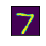

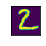

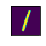

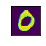

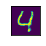

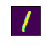

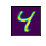

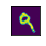

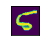

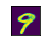

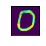

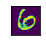

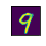

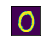

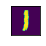

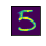

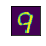

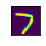

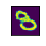

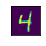

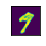

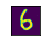

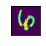

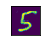

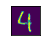

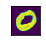

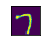

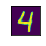

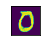

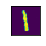

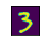

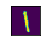

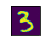

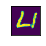

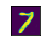

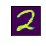

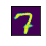

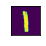

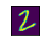

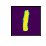

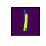

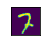

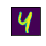

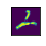

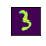

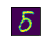

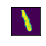

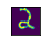

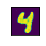

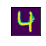

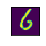

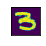

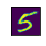

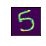

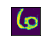

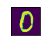

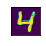

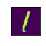

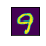

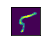

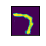

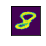

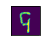

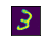

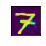

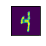

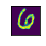

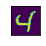

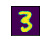

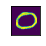

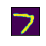

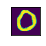

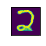

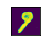

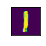

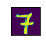

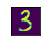

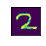

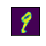

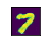

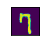

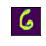

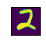

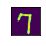

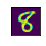

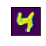

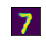

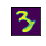

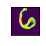

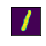

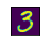

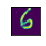

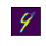

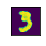

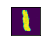

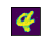

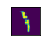

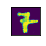

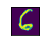

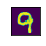

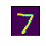

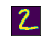

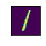

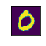

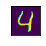

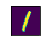

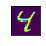

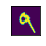

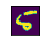

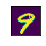

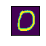

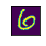

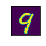

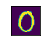

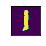

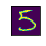

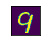

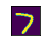

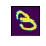

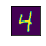

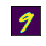

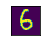

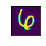

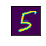

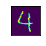

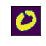

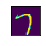

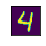

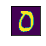

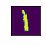

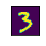

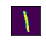

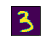

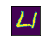

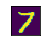

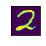

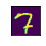

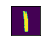

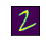

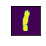

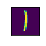

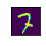

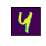

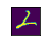

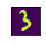

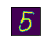

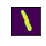

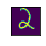

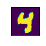

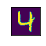

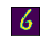

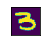

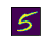

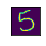

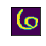

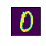

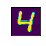

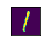

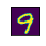

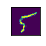

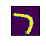

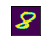

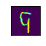

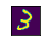

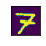

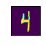

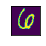

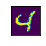

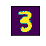

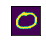

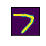

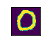

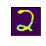

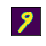

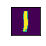

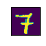

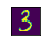

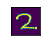

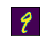

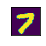

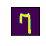

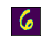

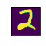

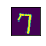

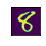

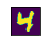

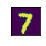

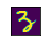

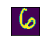

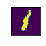

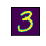

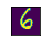

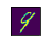

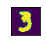

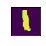

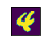

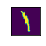

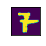

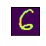

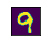

In [52]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for i in range(100):
        for start, end in zip(range(0, len(trX), 128),range(128, len(trX)+1, 128)):
            input_ = trX[start:end]
            mask_np = np.random.binomial(1,1 -corruption_level, input_.shape)
            sess.run(train_op, feed_dict={X:input_,mask:mask_np})
        mask_np = np.random.binomial(1,1-corruption_level, teX.shape) #binomial : 이항분포로 마스크 생성 : 원본이미지에 노이즈를 주기위해서 
        
        print(i, sess.run(cost, feed_dict={X: teX, mask:mask_np}))
    mask_np=np.random.binomial(1,1-corruption_level, teX[:100].shape)
    #예츷할 때 이미지에 마스크를 줌 :원본이미지를 훼손시킴 
    predicted_imgs = sess.run(predict_op, feed_dict={X: teX[:100], mask:mask_np})
    input_imgs = teX[:100]
vis(predicted_imgs,'pred')
vis(input_imgs, 'in')



#훼손된 이미지로ㅠ 학습하고 예측을 했는데도 값이 잘나옴 


## 판별 모델(discrimitive model)
      - 선을 그엉서 분류를하는
## VARIATIONAL AUTOENCODER (VAE)



## GENERATIVE MODEL 생성모델
    - 화률 평균+분산(분포)  이 분포를 잠재 변수라고 한다
    
## 잠재변수 ( latent variables) : 키,남자 , +> 특징 + 노이즈 
     - 중간에  특징을 

In [55]:
import tensorflow as tf 
from tensorflow.python.framework import ops
ops.reset_default_graph()
from functools import partial
n_inputs =28*28
n_hidden1 = 500
n_hidden2 = 500
n_hidden3 = 20
n_hidden4 = n_hidden2  #자기가 자기자신으로 돌아옴
n_hidden5 =n_hidden1 
n_outputs =n_inputs   #입력이 출력으로 


learning_rate = 0.001
#scaling없이 초기화 
initializer = tf.contrib.layers.variance_scaling_initializer()

In [63]:
my_dense_layer = partial(tf.layers.dense, # 매개변수 일부를 고정
                        activation =tf.nn.elu, #exponential linear unit( -1를 고려한 relu)
                        kernel_initializer=initializer) #activation / initializer 은 변하지않음
X = tf.placeholder(tf.float32,[None,n_inputs])
hidden1 = my_dense_layer(X,n_hidden1)
hidden2 = my_dense_layer(hidden1,n_hidden2)

hidden3_mean = my_dense_layer(hidden2,n_hidden3,activation = None)
hidden3_sigma =my_dense_layer(hidden2,n_hidden3,activation = None)

noise = tf.random_normal(tf.shape(hidden3_sigma),dtype = tf.float32)

#평균 ,시그마(분산) * 노이즈  로 변동된 특성을 뽑아내겠디
hidden3 = hidden3_mean + hidden3_sigma * noise #변동특성 _ #어느정도 노이즈를 감당할 수 있는 모델이된다 
hidden4 =  my_dense_layer(hidden3,n_hidden4)
hidden5 = my_dense_layer(hidden4,n_hidden5)  #hidden 5ㄱㅏ 자기자신 

logits = my_dense_layer(hidden5,n_outputs,activation=None)
outputs = tf.sigmoid(logits)

In [65]:
xentropy = tf.nn.sigmoid_cross_entropy_with_logits(labels = X, logits = logits) #입력값 ==출력값
#재구축 손실
reconstruction_loss = tf.reduce_sum(xentropy)
eps = 1e-10
#epsilon 상수 : 로그의 성질 : 0이면 무한대 
#epsilon 상수 :  부동소수점을 비교 0.0001 : 차가 0.0001이하면 같은 것으로 본다 
#cost funtion :                         시그마 제곱                      평균제곱         #log likligood 우도확률
# 지연손실(확률분포 곡선을)
latent_loss = 0.5 * tf.reduce_sum(tf.square(hidden3_sigma) + tf.square(hidden3_mean)-1 -tf.log(eps+tf.square(hidden3_sigma)))

loss = reconstruction_loss + latent_loss

optimizer =tf.train.AdamOptimizer(learning_rate = learning_rate)

training_op = optimizer.minimize(loss)

init =tf.global_variables_initializer()

In [73]:
import sys
n_digis = 60
n_epochs = 50
batch_size = 150
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs) :
        n_batches = mnist.train.num_examples // batch_size
        for iteration in range(n_batches):
            print("\r{}%".format(100 * iteration // n_batches),
                 end = '')
            sys.stdout.flush()
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict = {X:X_batch})
        loss_val , reconstruction_loss_val, latent_loss_val = sess.run([loss, reconstruction_loss , latent_loss], feed_dict={X:X_batch})
        print("\r{}".format(epoch), 'Train total loss: ', loss_val, '\tReconstruction loss: ',
             reconstruction_loss_val, '\tLatent loss : ', latent_loss_val)
        codings_rnd = np.random.normal(size = [n_digis, n_hidden3])
        outputs_val = outputs.eval(feed_dict={hidden3: codings_rnd})
        
# 가중치를 통과한 데이터 ( tset ) : 모델 완성
# PCA처럼 비지도학습의 특성으로 추출된 데이터 ( 분류와 예측이 잘되기 위해서 함 )

0 Train total loss:  28406.139 	Reconstruction loss:  24281.5 	Latent loss :  4124.638
1 Train total loss:  32128.396 	Reconstruction loss:  25147.299 	Latent loss :  6981.097
2 Train total loss:  26742.912 	Reconstruction loss:  22333.68 	Latent loss :  4409.232
3 Train total loss:  36265.938 	Reconstruction loss:  26649.941 	Latent loss :  9615.997
4 Train total loss:  24153.479 	Reconstruction loss:  19829.607 	Latent loss :  4323.871
5 Train total loss:  22280.166 	Reconstruction loss:  18746.887 	Latent loss :  3533.2795
6 Train total loss:  19156.84 	Reconstruction loss:  16073.25 	Latent loss :  3083.5903
7 Train total loss:  18392.66 	Reconstruction loss:  15490.973 	Latent loss :  2901.6885
89% Train total loss:  16992.938 	Reconstruction loss:  13920.748 	Latent loss :  3072.1887
9 Train total loss:  16726.492 	Reconstruction loss:  13515.414 	Latent loss :  3211.079
10 Train total loss:  16273.116 	Reconstruction loss:  13088.865 	Latent loss :  3184.251
11 Train total loss: